# Part One: Importing and Cleaning Data


In [103]:
import pandas as pd

society_data = pd.read_csv("Crimes_Against_Society.csv")
property_data = pd.read_csv("Crimes_Against_Property.csv")
Persons_data = pd.read_csv("Crimes_Against_Persons.csv")

society_data.head(10)
property_data.head(10)
Persons_data.head(10)

Crimes Against Persons Offenses                           Unnamed: 1  \
0                Offense Category                                  NaN   
1                  by State, 2020                                  NaN   
2                             NaN                                  NaN   
3                             NaN                                  NaN   
4                           State  Number\nof Participating\nAgencies    
5                           Total                                9,880   
6                         Alabama                                  131   
7                         Arizona                                   22   
8                        Arkansas                                  281   
9                        Colorado                                  225   

             Unnamed: 2       Unnamed: 3         Unnamed: 4  \
0                   NaN              NaN                NaN   
1                   NaN              NaN                NaN   
2                   NaN              NaN                NaN   
3                   NaN  Total\nOffenses   Offense Category   
4  Population\nCovered               NaN  Assault\nOffenses   
5           177,522,400        2,235,280          2,063,412   
6               715,130            4,384              4,214   
7             1,769,207           18,440             16,756   
8             2,818,360           63,893             60,103   
9             5,754,151           64,221             55,631   

           Unnamed: 5          Unnamed: 6              Unnamed: 7  \
0                 NaN                 NaN                     NaN   
1                 NaN                 NaN                     NaN   
2                 NaN                 NaN                     NaN   
3                 NaN                 NaN                     NaN   
4  Homicide\nOffenses  Human\nTrafficking  Kidnapping/\nAbduction   
5              11,815               1,576                  31,216   
6                  24                   0                      52   
7                  86                   5                     302   
8                 340                   2                     685   
9                 350                  30                   2,403   

      Unnamed: 8  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4  Sex\nOffenses  
5        127,261  
6             94  
7          1,291  
8          2,763  
9          5,807

now that we know that the data looks like, we are doing to do some reforming to make it more readable.

In [104]:
##removing the first five rows of each df that contains information/headers we do not need. We also, want to reset the
##index to make sure we get the proper index for later in the cleaning/analysis
society_data = society_data.iloc[5:].reset_index(drop=True)
property_data = property_data.iloc[5:].reset_index(drop=True)
Persons_data = Persons_data.iloc[5:].reset_index(drop=True)

##Dropping the last row since we know it contains char's
society_data = society_data.drop(society_data.index[-1])
property_data = property_data.drop(property_data.index[-1])
Persons_data = Persons_data.drop(Persons_data.index[-1])

Persons_data.head(10)
society_data.head(10)
property_data.head(10)

Crimes Against Property Offenses Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0                            Total      9,880  177,522,400  5,371,269   
1                          Alabama        131      715,130      7,981   
2                          Arizona         22    1,769,207     47,284   
3                         Arkansas        281    2,818,360    135,509   
4                         Colorado        225    5,754,151    257,623   
5                      Connecticut        105    3,488,526     78,197   
6                         Delaware         62      986,809     37,244   
7            District of Columbia1          1          NaN      1,065   
8                          Georgia        401    7,938,166    207,820   
9                           Hawaii          1      966,438     32,730   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0     21,829        622    522,400    102,486  1,016,618     19,819   
1         34          0        910        186      1,375         40   
2        186          1      4,404        567      8,390        147   
3        556          1     14,994      3,868     26,063         77   
4      1,329        156     22,539      3,910     48,987        313   
5        159          3      5,897      1,356     14,435        214   
6        138          1      2,572        427      9,085        150   
7          2          0          1          4        428          0   
8        651         12     18,567      5,526     36,394        312   
9        319          2      3,301        417        949         32   

  Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  
0       9,141     643,405   2,453,071     406,911     102,659      72,308  
1          13         820       3,840         541          66         156  
2         113       6,778      23,063       2,611         720         304  
3          47      23,636      54,991       7,355       1,440       2,481  
4         751      29,769     112,828      30,179       3,958       2,904  
5         164       8,575      37,125       7,295       1,695       1,279  
6          74       6,090      15,849       1,597         705         556  
7           0           9         412          29         165          15  
8         251      27,491      97,267      14,621       3,862       2,866  
9         134       4,091      18,238       3,744         743         760

Now we have to rename the columns to match what we want to look for...Since we know the original name of the columns from the excel file, we are going to add them to the data frame. 

# Note here, I added column names for each indivivual dataframe first. So this way data wont be lost and we can do a lot more testing and correlation stuff. 

In [105]:
new_column_names_one = {
    'Crimes Against Society Offenses': 'State',
    'Unnamed: 1': 'Number of Participating Agencies',
    'Unnamed: 2': 'Population Covered',
    'Unnamed: 3': 'Total Offenses',
    'Unnamed: 4': 'Animal Cruelty',
    'Unnamed: 5': 'Drug/ Narcotic Offenses',
    'Unnamed: 6': 'Gambling Offenses',
    'Unnamed: 7': 'Pornography/Obscene Material',
    'Unnamed: 8': 'Prostitution Offenses',
    'Unnamed: 9': 'Weapon Law Violations'
}
new_column_names_two = {
'Crimes Against Property Offenses': 'State',
'Unnamed: 1': 'Number of Participating Agencies',
'Unnamed: 2': 'Population Covered',
'Unnamed: 3': 'Total Offenses',
'Unnamed: 4': 'Arson',
'Unnamed: 5': 'Bribery',
'Unnamed: 6': 'Burglary Breaking & Entering',
'Unnamed: 7': 'Counterfeiting Forgery',
'Unnamed: 8': 'Destruction Damage Vandalism',
'Unnamed: 9': 'Embezzlement',
'Unnamed: 10': 'Extortion Blackmail',
'Unnamed: 11': 'Fraud Offenses',
'Unnamed: 12': 'Larceny Theft Offenses',
'Unnamed: 13': 'Motor Vehicle Theft',
'Unnamed: 14': 'Robbery',
'Unnamed: 15': 'Stolen Property Offenses',
}

new_column_names_three= {
'Crimes Against Persons Offenses': 'State',
'Unnamed: 1': 'Number of Participating Agencies',
'Unnamed: 2': 'Population Covered',
'Unnamed: 3': 'Total Offenses',
'Unnamed: 4': 'Assault Offenses',
'Unnamed: 5': 'Homicide Offenses',
'Unnamed: 6': 'Human Trafficking',
'Unnamed: 7': 'Kidnapping Abduction',
'Unnamed: 8': 'Sex Offenses'
}
society_data = society_data.rename(columns=new_column_names_one)
property_data = property_data.rename(columns=new_column_names_two)
Persons_data = Persons_data.rename(columns=new_column_names_three)

property_data.head(10)
society_data.head(10)
Persons_data.head(10)


State Number of Participating Agencies Population Covered  \
0                  Total                            9,880        177,522,400   
1                Alabama                              131            715,130   
2                Arizona                               22          1,769,207   
3               Arkansas                              281          2,818,360   
4               Colorado                              225          5,754,151   
5            Connecticut                              105          3,488,526   
6               Delaware                               62            986,809   
7  District of Columbia1                                1                NaN   
8                Georgia                              401          7,938,166   
9                 Hawaii                                1            966,438   

  Total Offenses Assault Offenses Homicide Offenses Human Trafficking  \
0      2,235,280        2,063,412            11,815             1,576   
1          4,384            4,214                24                 0   
2         18,440           16,756                86                 5   
3         63,893           60,103               340                 2   
4         64,221           55,631               350                30   
5         27,833           25,994               134                10   
6         16,154           15,255                87                 6   
7          1,062              994                 3                 0   
8         99,961           91,136               605               215   
9          9,376            8,358                25                10   

  Kidnapping Abduction Sex Offenses  
0               31,216      127,261  
1                   52           94  
2                  302        1,291  
3                  685        2,763  
4                2,403        5,807  
5                  249        1,446  
6                  215          591  
7                    3           62  
8                2,040        5,965  
9                  323          660

From our head above, we can see some states are reporting in a population of 0, we know that is not true as every state has atleast one person. So we will drop states with NA-values. 

In [106]:
society_data = society_data.dropna(subset=['Population Covered'])
property_data = property_data.dropna(subset=['Population Covered'])
Persons_data = Persons_data.dropna(subset=['Population Covered'])

property_data.head(10)
society_data.head(10)
Persons_data.head(10)

State Number of Participating Agencies Population Covered  \
0         Total                            9,880        177,522,400   
1       Alabama                              131            715,130   
2       Arizona                               22          1,769,207   
3      Arkansas                              281          2,818,360   
4      Colorado                              225          5,754,151   
5   Connecticut                              105          3,488,526   
6      Delaware                               62            986,809   
8       Georgia                              401          7,938,166   
9        Hawaii                                1            966,438   
10        Idaho                              107          1,819,575   

   Total Offenses Assault Offenses Homicide Offenses Human Trafficking  \
0       2,235,280        2,063,412            11,815             1,576   
1           4,384            4,214                24                 0   
2          18,440           16,756                86                 5   
3          63,893           60,103               340                 2   
4          64,221           55,631               350                30   
5          27,833           25,994               134                10   
6          16,154           15,255                87                 6   
8          99,961           91,136               605               215   
9           9,376            8,358                25                10   
10         16,972           14,725                48                 4   

   Kidnapping Abduction Sex Offenses  
0                31,216      127,261  
1                    52           94  
2                   302        1,291  
3                   685        2,763  
4                 2,403        5,807  
5                   249        1,446  
6                   215          591  
8                 2,040        5,965  
9                   323          660  
10                  241        1,954

# Part two: Data exploration

# For this project, we are going to be exploring the data by looking at some questions we have about the data. Here are the questions below:
<Ul> Which states have the highest and lowest number of State, property and society?
<Ol>Is there any correlation between population size and number of crimes in a state?

We are going to  explore the total number of crimes in each state

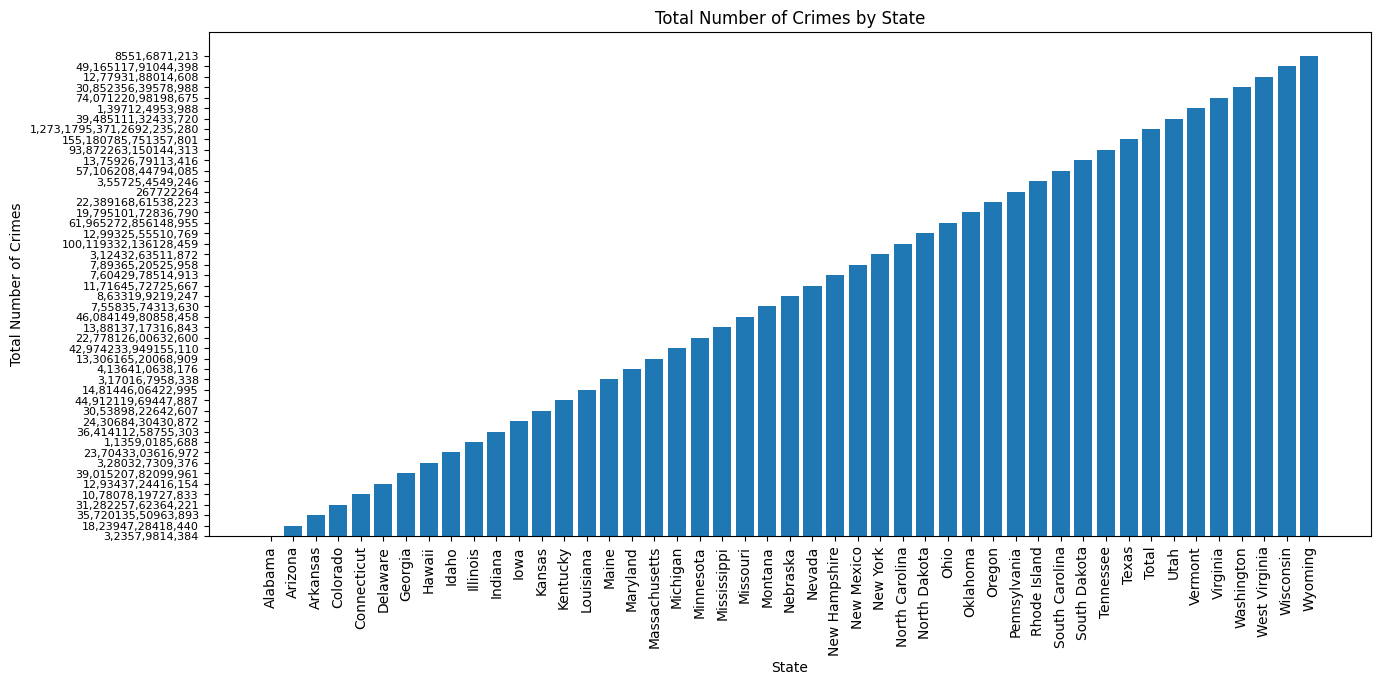

In [107]:
import matplotlib.pyplot as plt

# combine the data into a single dataframe
crime_data = pd.concat([society_data, property_data, Persons_data])

# calculate the total number of crimes for each state
state_totals = crime_data.groupby('State')['Total Offenses'].sum().reset_index()

# create a bar chart of the total number of crimes for each state
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(state_totals['State'], state_totals['Total Offenses'])
ax.set_xlabel('State')
ax.set_ylabel('Total Number of Crimes')
ax.set_title('Total Number of Crimes by State')
plt.xticks(rotation=90) # rotate the x-tick labels by 90 degrees
plt.yticks(fontsize=8) # decrease the font size of y-tick labels
plt.subplots_adjust(bottom=0.25) # adjust the bottom margin
plt.show()


Find the state with the highest number of offenses:

In [108]:
# calculate the total number of crimes for each state
state_totals = crime_data.groupby('State')['Total Offenses'].sum().reset_index()

# calculate summary statistics for the total number of crimes
summary_stats = state_totals['Total Offenses'].describe()

# print the summary statistics
print(summary_stats)


count                  47
unique                 47
top       3,2357,9814,384
freq                    1
Name: Total Offenses, dtype: object


Find the top 10 states with the highest crime

In [109]:
# create a new DataFrame with all crimes by state
all_crimes_by_state = pd.concat([property_data.groupby('State')['Total Offenses'].sum(),
                                 society_data.groupby('State')['Total Offenses'].sum(),
                                 Persons_data.groupby('State')['Total Offenses'].sum()], axis=1, sort=False)

# fill the missing values with 0
all_crimes_by_state.fillna(0, inplace=True)

# calculate the total number of crimes for each state
all_crimes_by_state['Total Crimes'] = all_crimes_by_state.sum(axis=1)

# remove the 'Total Crimes' column if it already exists
if 'Total Crimes' in all_crimes_by_state.columns:
    all_crimes_by_state.drop(columns=['Total Crimes'], inplace=True)

# add the 'Total Crimes' column again
all_crimes_by_state['Total Crimes'] = all_crimes_by_state.sum(axis=1)

# sort the data by the total number of crimes
sorted_crimes_by_state = all_crimes_by_state.sort_values('Total Crimes', ascending=False)

# select the top 10 states with the highest total number of crimes
top_10_states = sorted_crimes_by_state.head(10)

print(top_10_states)


             Total Offenses Total Offenses Total Offenses  \
State                                                       
Kansas               98,226         30,538         42,607   
Illinois              9,018          1,135          5,688   
Iowa                 84,304         24,306         30,872   
Texas               785,751        155,180        357,801   
Connecticut          78,197         10,780         27,833   
Pennsylvania            722            267            264   
Alabama               7,981          3,235          4,384   
New Mexico           65,205          7,893         25,958   
Total             5,371,269      1,273,179      2,235,280   
Arizona              47,284         18,239         18,440   

                             Total Crimes  
State                                      
Kansas                 98,22630,53842,607  
Illinois                  9,0181,1355,688  
Iowa                   84,30424,30630,872  
Texas               785,751155,180357,801  
Con

We are going to plot what we found above

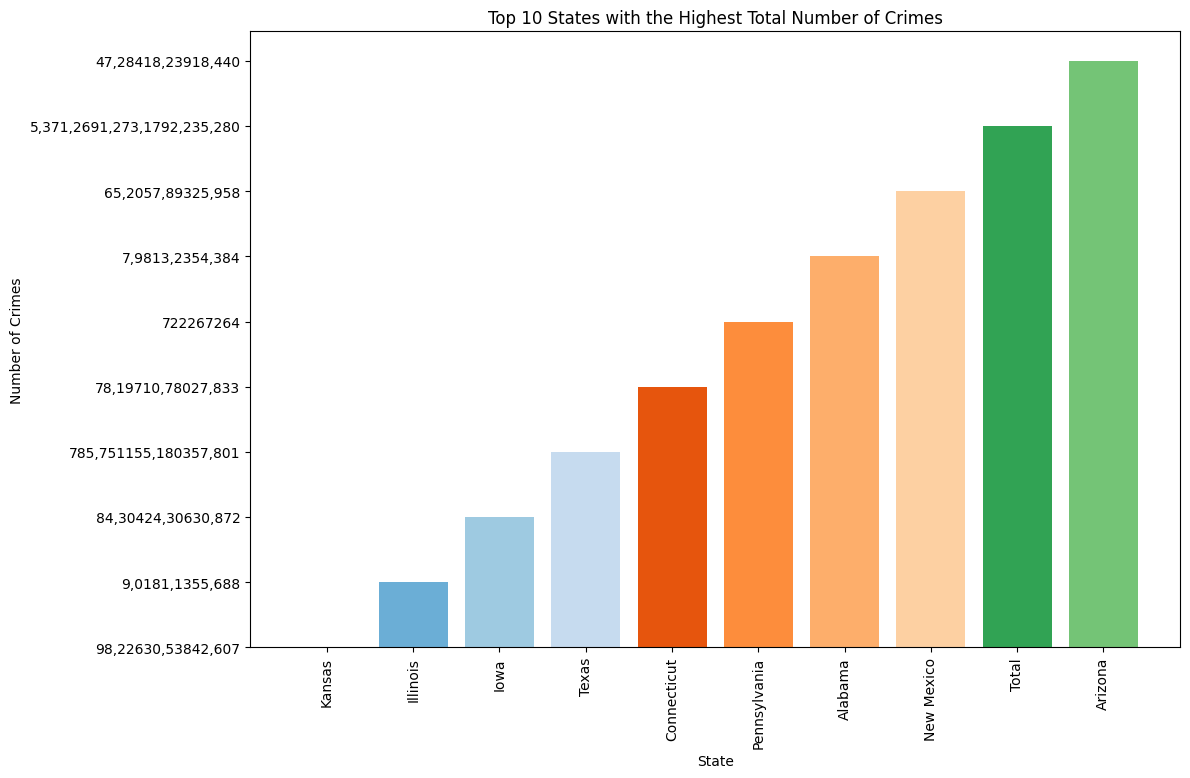

In [110]:
# create a bar chart for the top 10 states with the highest total number of crimes
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_10_states.index, top_10_states['Total Crimes'], color=plt.cm.tab20c(range(len(top_10_states))))

# set the labels and title for the chart
ax.set_xlabel('State')
ax.set_ylabel('Number of Crimes')
ax.set_title('Top 10 States with the Highest Total Number of Crimes')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# show the chart
plt.show()


Now we do more analysis on the type of crime that happen basedd of the types of crime happening to Persons, Society, and Property and understand how it reflects each state

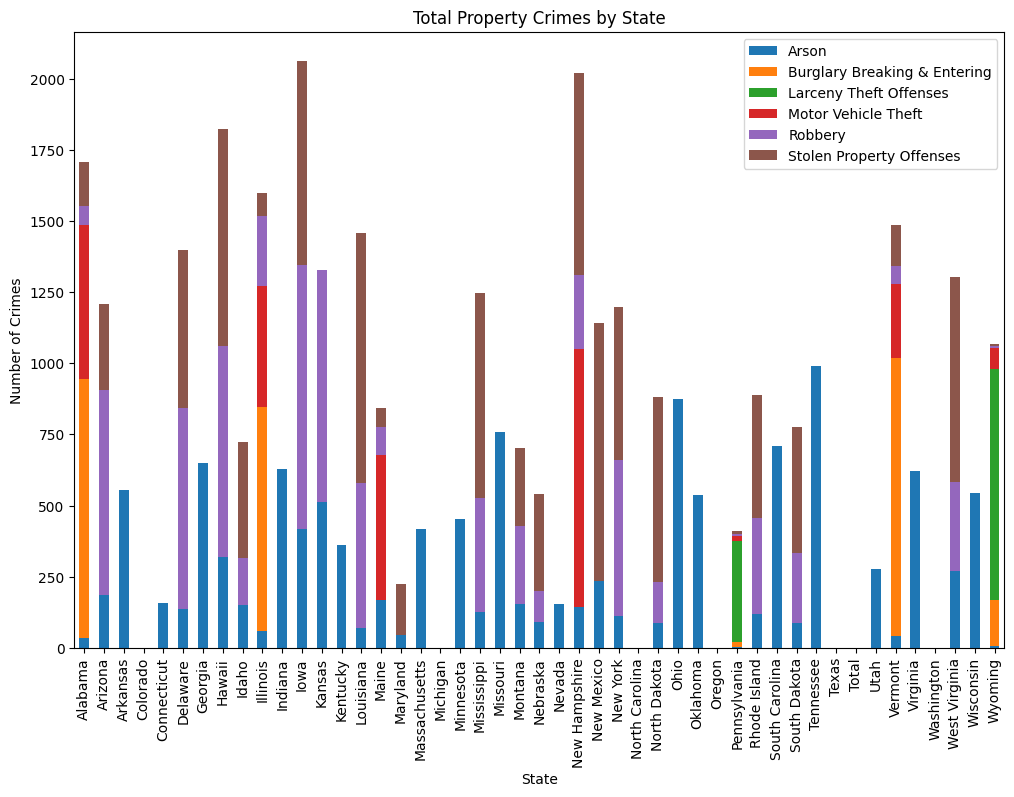

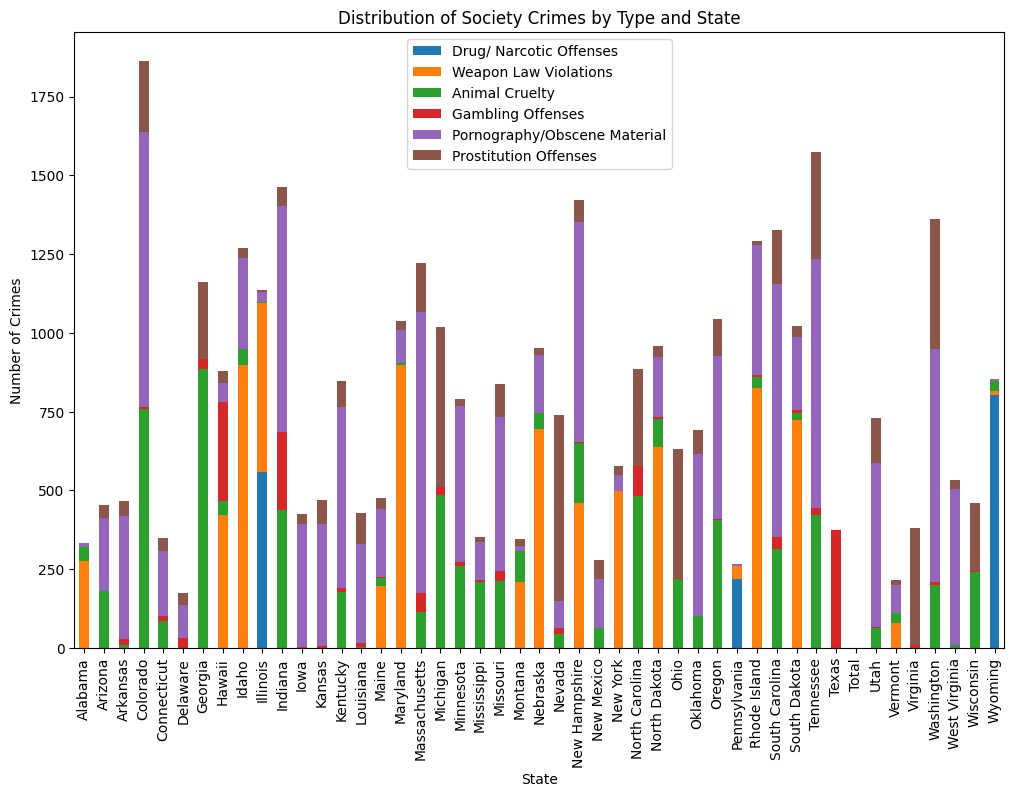

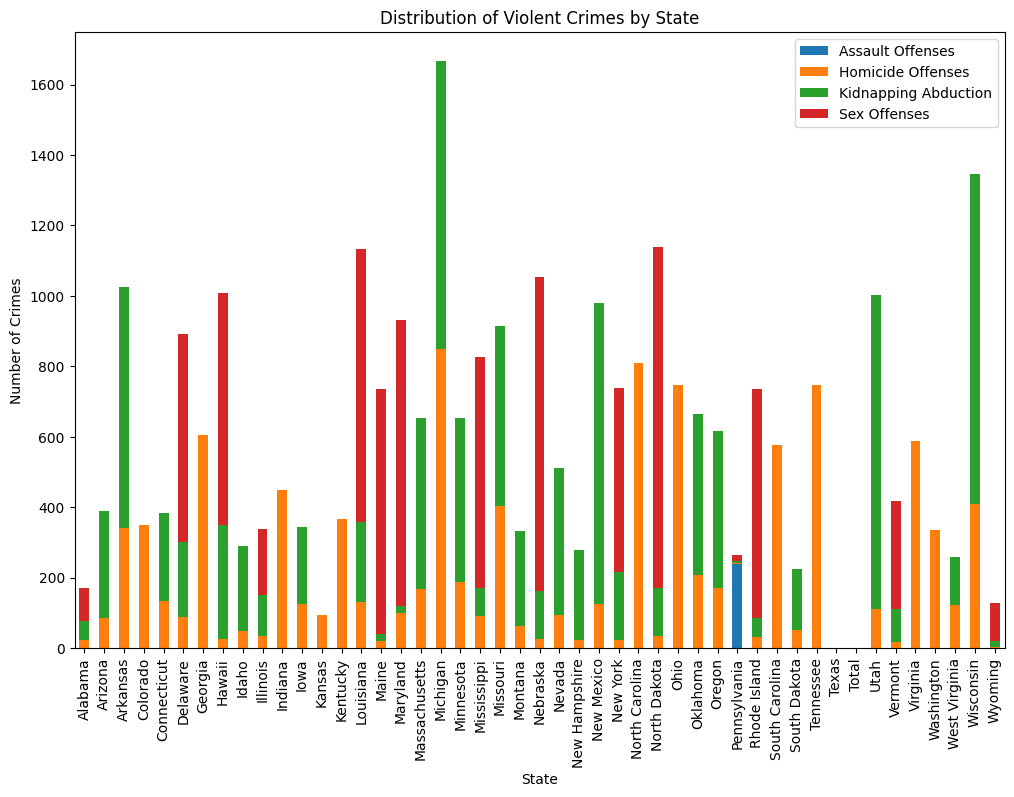

In [111]:
# group the data by state and sum the number of offenses for each type of crime
property_crimes_by_state = property_data.groupby('State')[['Arson', 'Burglary Breaking & Entering', 
                                                          'Larceny Theft Offenses', 'Motor Vehicle Theft',
                                                          'Robbery', 'Stolen Property Offenses']].sum()
society_crimes_by_state = society_data.groupby('State')[['Drug/ Narcotic Offenses', 'Weapon Law Violations',
                                                         'Animal Cruelty', 'Gambling Offenses', 
                                                         'Pornography/Obscene Material', 
                                                         'Prostitution Offenses']].sum()
person_crimes_by_state = Persons_data.groupby('State')[['Assault Offenses', 'Homicide Offenses', 
                                                       'Kidnapping Abduction', 'Sex Offenses']].sum()

# convert non-numeric columns to numeric
property_crimes_by_state = property_crimes_by_state.apply(pd.to_numeric, errors='coerce')

# create a stacked bar chart for property crimes
fig, ax = plt.subplots(figsize=(12, 8))
property_crimes_by_state.plot(kind='bar', stacked=True, ax=ax)

# set the labels and title for property crimes chart
ax.set_xlabel('State')
ax.set_ylabel('Number of Crimes')
ax.set_title('Total Property Crimes by State')

# show the property crimes plot
plt.show()
society_crimes_by_state = society_crimes_by_state.apply(pd.to_numeric, errors='coerce')

# create a stacked bar chart for society crimes
fig, ax = plt.subplots(figsize=(12, 8))
society_crimes_by_state.plot(kind='bar', stacked=True, ax=ax)

# set the labels and title for society crimes chart
ax.set_xlabel('State')
ax.set_ylabel('Number of Crimes')
ax.set_title('Distribution of Society Crimes by Type and State')

# show the society crimes plot
plt.show()

person_crimes_by_state = person_crimes_by_state.apply(pd.to_numeric, errors='coerce')

# create a stacked bar chart for persons crimes
fig, ax = plt.subplots(figsize=(12, 8))
person_crimes_by_state.plot(kind='bar', stacked=True, ax=ax)

# set the labels and title for persons crimes chart
ax.set_xlabel('State')
ax.set_ylabel('Number of Crimes')
ax.set_title('Distribution of Violent Crimes by State')

# show the persons crimes plot
plt.show()


Next we plan to answer the question: Is there any correlation between population size and number of crimes in a state?.

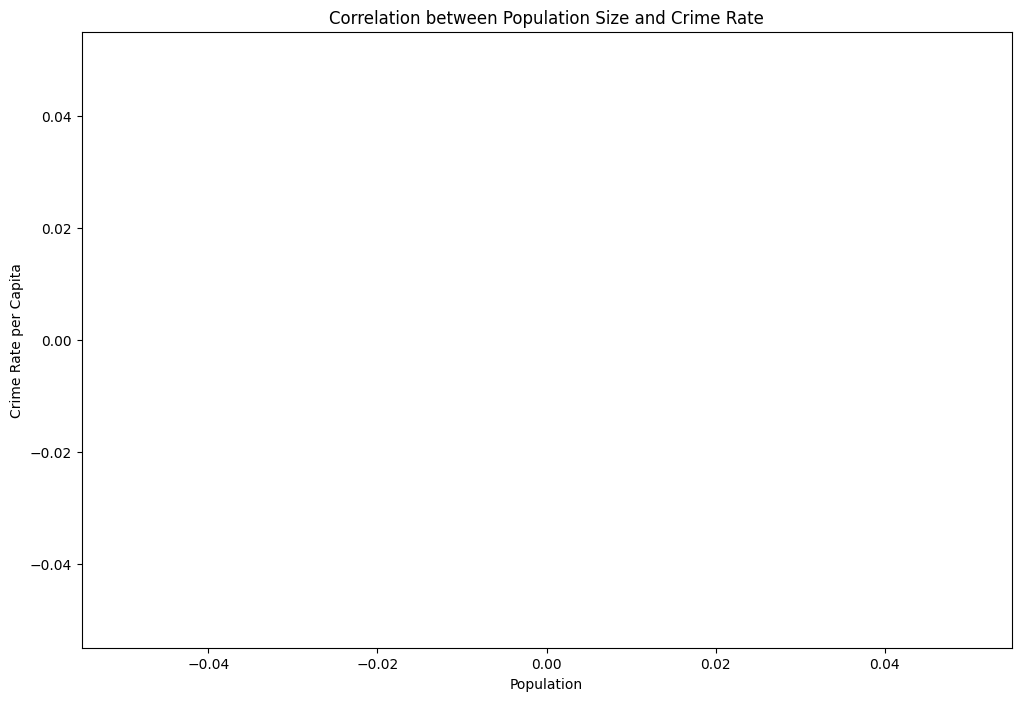

In [112]:

# calculate the crime rate per capita for each state
crime_data['Total Offenses'] = pd.to_numeric(crime_data['Total Offenses'], errors='coerce')
crime_data['Population Covered'] = pd.to_numeric(crime_data['Population Covered'], errors='coerce')
crime_data['Crime Rate per Capita'] = crime_data['Total Offenses'] / crime_data['Population Covered']

# create a scatter plot to visualize the correlation between crime rate and population size
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(crime_data['Population Covered'], crime_data['Crime Rate per Capita'], color='blue')

# set the labels and title for the chart
ax.set_xlabel('Population')
ax.set_ylabel('Crime Rate per Capita')
ax.set_title('Correlation between Population Size and Crime Rate')

# show the chart
plt.show()


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Concatenate the dataframes into a single dataframe
data = pd.concat([society_data, property_data, Persons_data], axis=0)

# Extract the relevant features
features = ['Population Covered', 'Total Offenses', 'Number of Participating Agencies', 'Animal Cruelty', 'Drug/ Narcotic Offenses', 'Gambling Offenses', 'Pornography/Obscene Material', 'Prostitution Offenses', 'Weapon Law Violations', 'Arson', 'Bribery', 'Burglary Breaking & Entering', 'Counterfeiting Forgery', 'Destruction Damage Vandalism', 'Embezzlement', 'Extortion Blackmail', 'Fraud Offenses', 'Larceny Theft Offenses', 'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses', 'Assault Offenses', 'Homicide Offenses', 'Human Trafficking', 'Kidnapping Abduction', 'Sex Offenses']

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data[features], data['State'], test_size=0.2)
train_data = train_data[train_data['State'].apply(lambda x: isinstance(x, str))]
train_target = train_target[train_data.index]

# Train a random forest classifier on the training set
model = RandomForestClassifier()
model.fit(train_data, train_target)

# Evaluate the model on the testing set
predictions = model.predict(test_data)
accuracy = accuracy_score(test_target, predictions)

print(f'Test accuracy: {accuracy:.2f}')


KeyError: ignored

 Pearson correlation coefficient of -1.604717266670189e-05 indicates a very weak or almost no linear correlation between the population size and the number of crimes in a state. Since the value is close to 0, it suggests that there is no significant relationship between these two variables.

# Part 3: ML Algorthim

In this part, we are going to use a Decision tree to answer the question: Can we use ML algorithms to predict the likelihood of a particular type of crime offense based on the population size, the number of participating agencies, and other relevant factors?


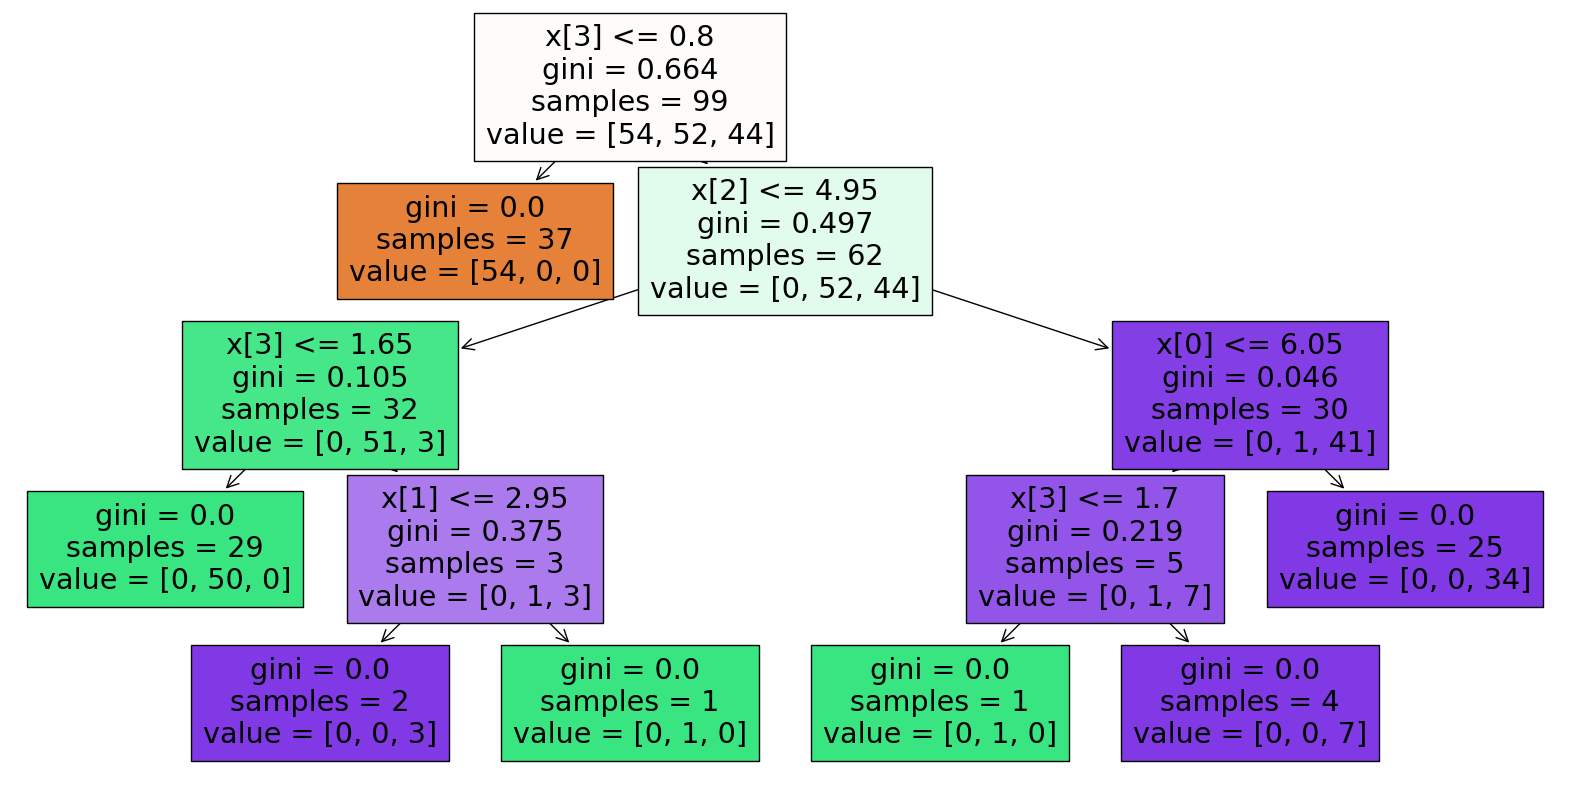

ValueError: ignored

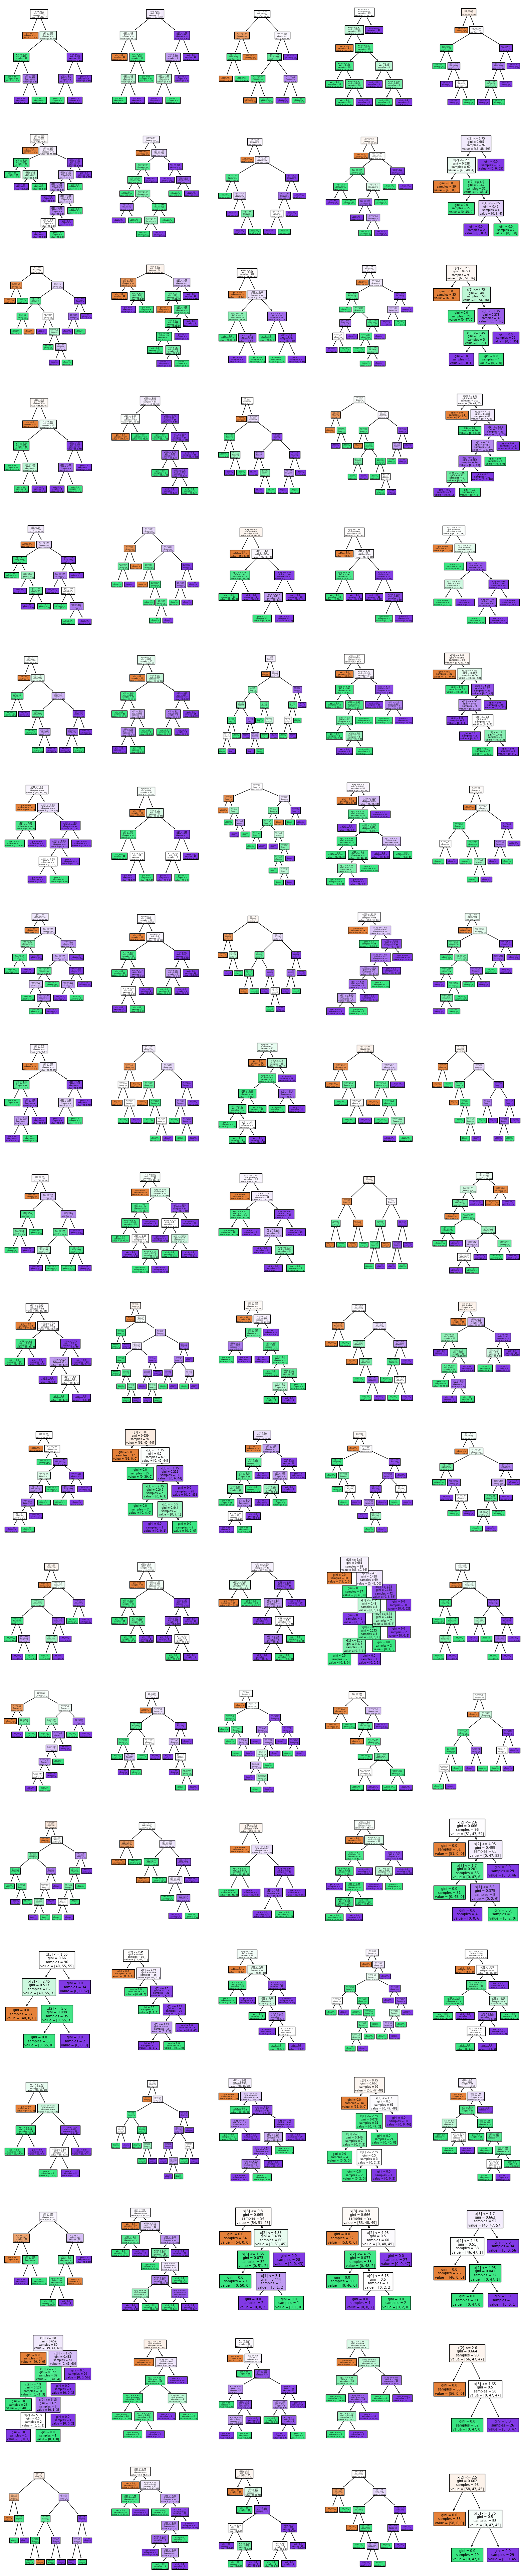

In [121]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Create a random forest classifier with 1000 trees
rf = RandomForestClassifier(n_estimators=1000)

# Train the random forest classifier
rf.fit(iris.data, iris.target)

# Plot the first tree in the random forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True)
plt.show()

# Plot all the trees in the random forest
plt.figure(figsize=(20, 100))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(20, 5, i+1)
    plot_tree(tree, filled=True)
plt.show()
